# Word2Vec

In [2]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [3]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [5]:
sentences = [['this', 'is', 'a',   'good',      'product'],
             ['it',   'is', 'a',   'excellent', 'product'],
             ['it',   'is', 'a',   'bad',       'product'],
             ['that', 'is', 'the', 'worst',     'product']]

In [6]:
# 문장을 이용하여 단어와 벡터를 생성한다.

model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)  # size: 벡터 차원, workers: 스레드 사용 갯수

In [10]:
# 단어벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [11]:
word_vectors

In [15]:
print(len(vocabs))
vocabs

11


dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [25]:
# 단어간 유사도를 확인하다
print(word_vectors.similarity(w1='it', w2='this'))

0.04944589


Word2Vec 학습 과정: `[11 x 11]` * `[11 x 300]` = `[11 x 300]`

In [24]:
word_vectors_list[0][:50]

array([-2.3844337e-05, -1.1002600e-04, -1.4196278e-04, -1.2327170e-04,
       -1.1826132e-03,  1.5756433e-03, -2.9253011e-04, -1.1153468e-03,
       -6.0882396e-04,  1.6719145e-04,  1.7041787e-04,  1.2738994e-04,
       -1.6384781e-03,  1.1088734e-03,  1.4123109e-03, -1.5510403e-03,
        8.2619494e-04, -3.8016407e-04,  1.3823019e-03, -1.3022999e-03,
       -1.9689984e-04, -1.0615091e-03, -3.3724593e-04,  6.5851712e-04,
       -1.2534240e-03,  2.9895609e-04,  2.0344269e-04, -1.4100481e-03,
        1.1818539e-04, -9.2716992e-04,  1.3287263e-03, -1.6272431e-03,
        4.0924159e-04, -4.3598565e-04,  1.2797764e-05,  1.2843951e-04,
       -1.3656925e-03,  1.6657972e-03,  3.8351413e-04, -1.3073557e-03,
       -1.1283627e-03,  7.3907350e-04, -1.5147161e-03,  6.5140636e-04,
       -5.3917605e-04, -1.3933972e-03,  1.2316967e-03, -1.3620100e-03,
       -1.3524164e-03, -5.3737254e-04], dtype=float32)

In [21]:
print(len(word_vectors_list))
print(len(word_vectors_list[0]))
word_vectors_list[0].shape

11
300


(300,)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

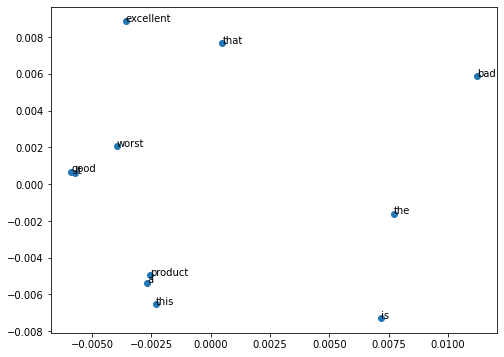

In [27]:
plot_2d_graph(vocabs, xs, ys)

# 미리 학습된 모델과 병합

In [ ]:
# https://github.com/mmihaltz/word2vec-GoogleNews-vectors
# URL에서 미리 학습된 모델을 다운로드 받는다.
file_name = 'GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=file_name, binary=True)

In [ ]:
# 단어벡터를 구한다.
word_vectors = model.wv

vocabs            = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
# 단어간 유사도를 확인하다
print(word_vectors.similarity(w1='it', w2='this'))

In [ ]:
if np.issubdtype(vec.dtype, np.int):
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
plot_2d_graph(vocabs, xs, ys)

In [ ]:
model.save('word2vec.model') # 모델 저장

In [ ]:
model = Word2Vec.load('word2vec.model')  # 모델 읽어오기